<a href="https://colab.research.google.com/github/hansikagollen/smart-food-anlyzer/blob/main/major_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!ls "/content/drive/MyDrive/projectdatasets"


fresh_apple	    fresh_orange  stale_banana	      stale_tomato
fresh_banana	    fresh_tomato  stale_bitter_gourd
fresh_bitter_gourd  semi_rotten   stale_capsicum
fresh_capsicum	    stale_apple   stale_orange


In [3]:
data_dir = "/content/drive/MyDrive/datasets"


In [8]:
# 1️⃣ Import os module
import os

# 2️⃣ Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 3️⃣ Set your dataset base path in Drive
base = "/content/drive/MyDrive/projectdatasets"  # <-- change to your folder path

# 4️⃣ List all folders starting with 'Fresh' and 'Rotten' (or 'Stale')
fresh_folders = [f for f in os.listdir(base) if f.lower().startswith("fresh")]
stale_folders = [f for f in os.listdir(base) if f.lower().startswith("rotten") or f.lower().startswith("stale")]

# 5️⃣ Count images inside each category
fresh_count = sum(len(os.listdir(os.path.join(base, f))) for f in fresh_folders)
stale_count = sum(len(os.listdir(os.path.join(base, f))) for f in stale_folders)

# 6️⃣ Print results
print("Total Fresh Images:", fresh_count)
print("Total Stale/Rotten Images:", stale_count)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Total Fresh Images: 7052
Total Stale/Rotten Images: 7644


In [18]:
# 1️⃣ Import libraries
import cv2
import os
import numpy as np
from tqdm import tqdm

# 2️⃣ Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 3️⃣ Set paths
base = "/content/drive/MyDrive/projectdatasets"           # path to your uploaded dataset in Drive
output_base = "/content/drive/MyDrive/projectdatasets/semi_rotten"  # where generated images will be saved
os.makedirs(output_base, exist_ok=True)

# 4️⃣ List stale/rotten folders
stale_folders = [f for f in os.listdir(base) if f.lower().startswith("rotten") or f.lower().startswith("stale")]

# 5️⃣ Define function to make semi-rotten images
def make_semi_rotten(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv[..., 1] = hsv[..., 1] * np.random.uniform(0.7, 0.9)  # lower saturation
    hsv[..., 2] = hsv[..., 2] * np.random.uniform(0.6, 0.8)  # darken brightness
    semi = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    semi = cv2.GaussianBlur(semi, (3,3), 0)
    noise = np.random.randint(0, 25, img.shape, dtype='uint8')
    semi = cv2.addWeighted(semi, 0.9, noise, 0.1, 0)
    return semi

# 6️⃣ Generate semi-rotten images
for folder in tqdm(stale_folders):
    fruit_type = folder.split("_", 1)[1]  # e.g. 'apple'
    stale_path = os.path.join(base, folder)
    semi_path = os.path.join(output_base, f"semi_{fruit_type}")
    os.makedirs(semi_path, exist_ok=True)

    img_names = os.listdir(stale_path)
    for img_name in img_names:
        img_path = os.path.join(stale_path, img_name)
        img = cv2.imread(img_path)
        if img is None:
            continue
        semi_img = make_semi_rotten(img)
        cv2.imwrite(os.path.join(semi_path, f"semi_{img_name}"), semi_img)

print("✅ Semi-rotten images generated and saved to:", output_base)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


100%|██████████| 6/6 [1:20:49<00:00, 808.30s/it]

✅ Semi-rotten images generated and saved to: /content/drive/MyDrive/projectdatasets/semi_rotten


In [20]:
import os

# Path to your semi-rotten images folder
semi_rotten_base = "/content/drive/MyDrive/projectdatasets/semi_rotten"  # change to your path

# Loop through each subfolder and count images
for folder in os.listdir(semi_rotten_base):
    path = os.path.join(semi_rotten_base, folder)
    if os.path.isdir(path):  # make sure it's a folder
        print(folder, "->", len(os.listdir(path)), "images")


semi_apple -> 2342 images
semi_banana -> 1467 images
semi_bitter_gourd -> 357 images
semi_capsicum -> 901 images
semi_orange -> 1595 images
semi_tomato -> 982 images


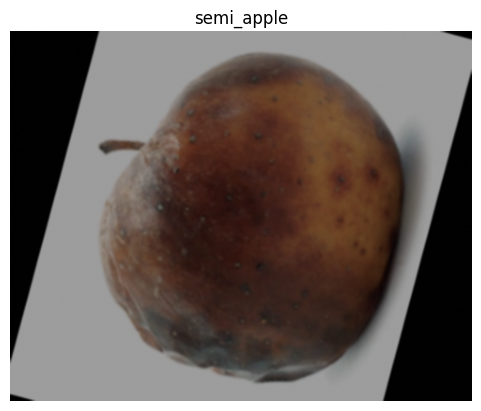

In [21]:
import cv2
import matplotlib.pyplot as plt
import random
import os

# 1️⃣ Set folder path
folder = "semi_apple"
semi_rotten_base = "/content/drive/MyDrive/projectdatasets/semi_rotten"  # change if needed
folder_path = os.path.join(semi_rotten_base, folder)

# 2️⃣ Pick a random image
img_name = random.choice(os.listdir(folder_path))
img_path = os.path.join(folder_path, img_name)

# 3️⃣ Read and display the image
img = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title(folder)
plt.axis("off")
plt.show()


##Step 2: Preprocessing & Data Augmentation

In [22]:
# 3️⃣ Import libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 4️⃣ Data augmentation and train/validation split
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8,1.2],
    validation_split=0.2
)

train_gen = train_datagen.flow_from_directory(
    base,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = train_datagen.flow_from_directory(
    base,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)


Found 17876 images belonging to 13 classes.
Found 4464 images belonging to 13 classes.


In [23]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

# Number of classes in your dataset
num_classes = train_gen.num_classes

# Load MobileNetV2 without top layers, pretrained on ImageNet
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
outputs = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=outputs)

# Freeze all but top 30 layers
for layer in base_model.layers[:-30]:
    layer.trainable = False
for layer in base_model.layers[-30:]:
    layer.trainable = True

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,274,637 (8.68 MB)

 Trainable params: 1,543,053 (5.89 MB)

 Non-trainable params: 731,584 (2.79 MB)

In [29]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define your callbacks
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-6
)

# Train the model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,
    callbacks=[early_stop, reduce_lr]
)


Epoch 1/20
319/559 ━━━━━━━━━━━━━━━━━━━━ 34:03 9s/step - accuracy: 0.6438 - loss: 1.1806

KeyboardInterrupt: 

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# ✅ Build MobileNetV2 base
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze convolutional base for fast training

# ✅ Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
output = Dense(train_gen.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output)

# ✅ Compile model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# ✅ Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, min_lr=1e-6)

# ✅ Train model (fast phase)
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    callbacks=[early_stop, reduce_lr]
)


Epoch 1/10
559/559 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3778 - loss: 1.9215